# Exploring Dandiset 001433: Breathing rhythm and place dataset

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356).

The Dandiset is titled: "Breathing rhythm and place dataset".

Description: "These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903"

This notebook will cover:
- Listing required packages.
- Loading the Dandiset using the DANDI API.
- Loading and inspecting an NWB file from the Dandiset.
- Visualizing some of the data contained in the NWB file.
- Summarizing findings and suggesting potential future analyses.

## Required Packages

The following Python packages are required to run this notebook. It is assumed that these are already installed on your system.
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`
- `seaborn`

## Loading the Dandiset

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Loading an NWB File

We will load the first NWB file listed in the assets: `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`.
The asset ID for this file is `63d19f03-2a35-48bd-a54f-9ab98ceb7be2`.
The URL for this asset is `https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/`.

In [2]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Add mode='r' for read-only
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata

Let's display some basic metadata from the loaded NWB file.

In [3]:
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
if nwb.experimenter:
    print(f"Experimenter(s): {', '.join(nwb.experimenter)}")
else:
    print("Experimenter(s): Not specified")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

Session Description: LFP and sniff recording
Identifier: 4122_4
Session Start Time: 2025-05-07 15:29:27.359523-07:00
Experimenter(s): Rafilson, Sidney
Lab: Smear lab
Institution: University of Oregon


### Explore NWB File Contents

We can explore the contents of the NWB file. For example, we can list the acquisition objects.
A link to explore this NWB file on Neurosift: [Neurosift Link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=draft)

In [4]:
print("Acquisition objects:")
for acq_name, acq_object in nwb.acquisition.items():
    print(f"- {acq_name}: {type(acq_object)}")

print("\nProcessing modules:")
for proc_name, proc_module in nwb.processing.items():
    print(f"- {proc_name}: {type(proc_module)}")
    for int_name, int_object in proc_module.data_interfaces.items():
        print(f"  - {int_name}: {type(int_object)}")

Acquisition objects:
- LFP: <class 'pynwb.ecephys.ElectricalSeries'>
- SniffSignal: <class 'pynwb.base.TimeSeries'>

Processing modules:
- behavior: <class 'pynwb.base.ProcessingModule'>
  - exhalation_time: <class 'pynwb.base.TimeSeries'>
  - inhalation_time: <class 'pynwb.base.TimeSeries'>


### Summarizing NWB File Contents (sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb)

Based on the output from `tools_cli.py nwb-file-info`:

- **NWBFile General Information:**
    - `session_description`: LFP and sniff recording
    - `identifier`: 4122_4
    - `session_start_time`: 2025-05-07T15:29:27.359523-07:00
    - `experimenter`: ['Rafilson, Sidney']
    - `keywords`: ['olfactory bulb' 'LFP' 'sniffing' 'mouse' 'neuroscience']

- **Acquisition Data (`nwb.acquisition`):**
    - `LFP` (pynwb.ecephys.ElectricalSeries): LFP signal from olfactory bulb
        - `data`: shape (1969184, 16), dtype float64
        - `rate`: 1000.0 Hz
        - `electrodes`: DynamicTableRegion referencing 16 electrodes.
            - Electrode metadata includes: `location`, `group`, `group_name`, `filtering`.
    - `SniffSignal` (pynwb.base.TimeSeries): Raw sniff thermistor voltage
        - `data`: shape (1969184,), dtype float64
        - `rate`: 1000.0 Hz

- **Processing Data (`nwb.processing['behavior']`):**
    - `behavior` (pynwb. procesamiento.ProcessingModule): Sniff event features
        - `exhalation_time` (pynwb.base.TimeSeries): exhalation_time (s)
            - `data`: shape (10030,), dtype int64
            - `timestamps`: shape (10030,), dtype float64
        - `inhalation_time` (pynwb.base.TimeSeries): inhalation_time (s)
            - `data`: shape (10030,), dtype int64
            - `timestamps`: shape (10030,), dtype float64

- **Electrode Information:**
    - `nwb.electrode_groups['LFPGroup']`:
        - `description`: LFP recording electrodes
        - `location`: Olfactory Bulb
    - `nwb.electrodes` (pynwb.file.DynamicTable): Metadata about 16 extracellular electrodes.
        - Columns: `location`, `group`, `group_name`, `filtering`.

- **Subject Information (`nwb.subject`):**
    - `age`: P90D
    - `description`: Lab mouse used for sniffing + LFP experiment
    - `sex`: M
    - `species`: Mus musculus
    - `subject_id`: 4122

### Visualizing LFP Data

Let's load and visualize a small segment of the LFP data from one channel.
The LFP data is stored in `nwb.acquisition['LFP']`. It has shape (1969184, 16).
We will plot the first 5 seconds of data from the first channel.
The sampling rate is 1000 Hz.

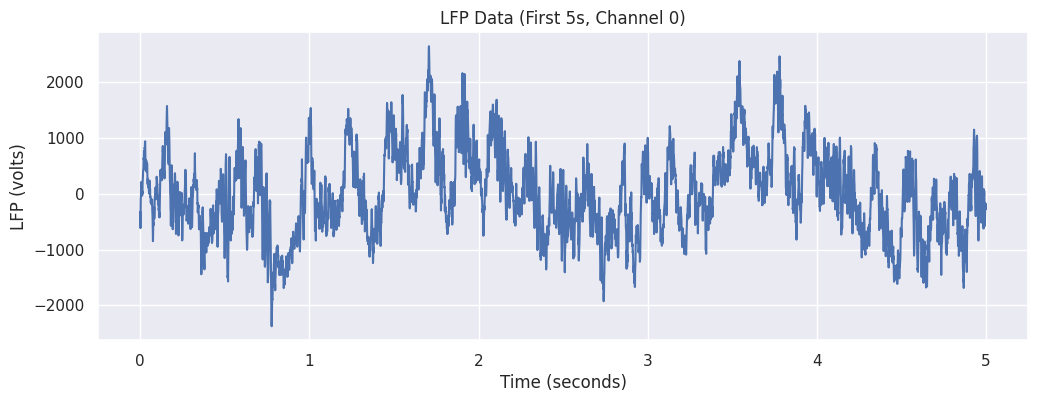

In [5]:
sns.set_theme() # Apply seaborn styling

lfp_series = nwb.acquisition['LFP']
lfp_data_segment = lfp_series.data[0:5000, 0] # First 5000 samples (5 seconds), first channel
time_axis_lfp = np.arange(len(lfp_data_segment)) / lfp_series.rate

plt.figure(figsize=(12, 4))
plt.plot(time_axis_lfp, lfp_data_segment)
plt.xlabel(f"Time ({lfp_series.starting_time_unit})")
plt.ylabel(f"LFP ({lfp_series.unit})")
plt.title("LFP Data (First 5s, Channel 0)")
plt.grid(True)
plt.show()

To understand which channel this corresponds to, we can look at the `electrodes` table associated with the LFP data.

In [6]:
lfp_electrodes_df = lfp_series.electrodes.table.to_dataframe()
print("LFP Electrodes Table (first 5 rows):")
print(lfp_electrodes_df.head())
print(f"\nData plotted was from electrode with id: {lfp_electrodes_df.index[0]}")
print(f"Details for this electrode: \n{lfp_electrodes_df.iloc[0]}")

LFP Electrodes Table (first 5 rows):
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x136...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x136...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x136...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x136...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x136...   

   group_name filtering  
id                       
0    LFPGroup      none  
1    LFPGroup      none  
2    LFPGroup      none  
3    LFPGroup      none  
4    LFPGroup      none  

Data plotted was from electrode with id: 0
Details for this electrode: 
location                                         olfactory bulb
group         LFPGroup pynwb.ecephys.ElectrodeGroup at 0x136...
group_name                                             LFPGroup
filt

### Visualizing Sniff Signal Data

Now, let's visualize a segment of the sniff signal.
The sniff signal data is stored in `nwb.acquisition['SniffSignal']`. It has shape (1969184,).
We will plot the same first 5 seconds of data. The sampling rate is also 1000 Hz.

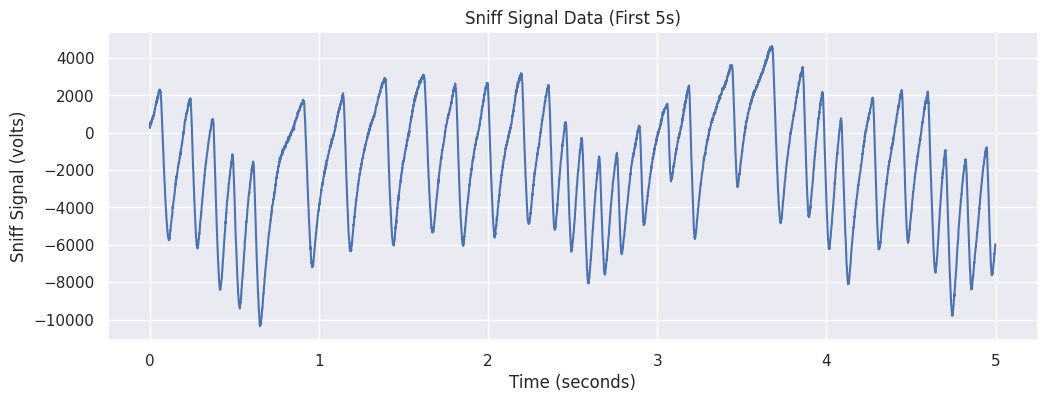

In [7]:
sniff_series = nwb.acquisition['SniffSignal']
sniff_data_segment = sniff_series.data[0:5000] # First 5000 samples (5 seconds)
time_axis_sniff = np.arange(len(sniff_data_segment)) / sniff_series.rate

plt.figure(figsize=(12, 4))
plt.plot(time_axis_sniff, sniff_data_segment)
plt.xlabel(f"Time ({sniff_series.starting_time_unit})")
plt.ylabel(f"Sniff Signal ({sniff_series.unit})")
plt.title("Sniff Signal Data (First 5s)")
plt.grid(True)
plt.show()

### Visualizing Sniff Events (Inhalation/Exhalation Times)

The NWB file contains processed behavioral data: inhalation and exhalation times.
These are stored in `nwb.processing['behavior']`.
`inhalation_time` and `exhalation_time` are TimeSeries objects. Their `timestamps` attribute stores the event times.
Let's plot these events over the sniff signal for the first 30 seconds to see how they align.

In [8]:
# Load a longer segment of sniff data for context
duration_plot_events = 30 # seconds
num_samples_plot_events = int(duration_plot_events * sniff_series.rate)
sniff_data_long_segment = sniff_series.data[0:num_samples_plot_events]
_time_axis_sniff_long = np.arange(len(sniff_data_long_segment)) / sniff_series.rate

# Get inhalation and exhalation timestamps
inhalation_times = nwb.processing['behavior']['inhalation_time'].timestamps[:]
exhalation_times = nwb.processing['behavior']['exhalation_time'].timestamps[:]

# Filter events within the plotted duration
inhalation_times_segment = inhalation_times[inhalation_times &lt;= duration_plot_events]
exhalation_times_segment = exhalation_times[exhalation_times &lt;= duration_plot_events]


plt.figure(figsize=(15, 5))
plt.plot(_time_axis_sniff_long, sniff_data_long_segment, label='Sniff Signal', color='gray', alpha=0.7)

plt.vlines(inhalation_times_segment, ymin=np.min(sniff_data_long_segment), ymax=np.max(sniff_data_long_segment),
           color='blue', linestyle='--', label='Inhalation Times', lw=1)
plt.vlines(exhalation_times_segment, ymin=np.min(sniff_data_long_segment), ymax=np.max(sniff_data_long_segment),
           color='red', linestyle=':', label='Exhalation Times', lw=1)

plt.xlabel(f"Time ({sniff_series.starting_time_unit})")
plt.ylabel(f"Sniff Signal ({sniff_series.unit})")
plt.title(f"Sniff Signal with Inhalation/Exhalation Events (First {duration_plot_events}s)")
plt.legend()
plt.grid(True)
plt.xlim(0, duration_plot_events)
plt.show()

print(f"Number of inhalations in the first {duration_plot_events}s: {len(inhalation_times_segment)}")
print(f"Number of exhalations in the first {duration_plot_events}s: {len(exhalation_times_segment)}")

SyntaxError: invalid syntax (3509846376.py, line 12)

Note: The `data` attribute of `inhalation_time` and `exhalation_time` (e.g., `nwb.processing['behavior']['inhalation_time'].data[:]`) seems to contain integer counts or indices, not the direct timestamps themselves. The actual event times are in the `timestamps` attribute.

## Summary and Future Directions

This notebook demonstrated how to:
- Load a Dandiset and inspect its metadata and assets.
- Load a specific NWB file from the Dandiset using its DANDI API URL.
- Access and display metadata from the NWB file.
- Visualize segments of continuous data like LFP and raw sniff signals.
- Plot event data (inhalation/exhalation times) alongside continuous signals.

**Possible Future Directions:**
- **Spectral Analysis of LFP:** Perform Fourier transforms on LFP segments to analyze power in different frequency bands (e.g., theta, gamma) and how it correlates with sniffing behavior.
- **Sniffing Parameters:** Calculate more detailed sniffing parameters like breath duration, frequency, and inhalation/exhalation ratios from the event times.
- **Cross-channel LFP Analysis:** Investigate coherence or phase relationships between different LFP channels in the olfactory bulb.
- **Correlation between Sniffing and LFP:** Explore how features of the LFP signal (e.g., power in specific bands) change in relation to different phases of the sniff cycle.
- **Analysis across multiple NWB files:** Extend these analyses to other NWB files in the Dandiset to look for consistencies or differences across sessions or subjects (if applicable, though this Dandiset description implies a single subject group). This would require checking subject metadata for each file.

Remember to consult the NWB format documentation and PyNWB tutorials for more advanced data access and analysis techniques.